In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


#**ANALISIS EXPLORATORIO**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df["churned"].value_counts(normalize=True)

,proportion
churned,
1,0.503
0,0.497


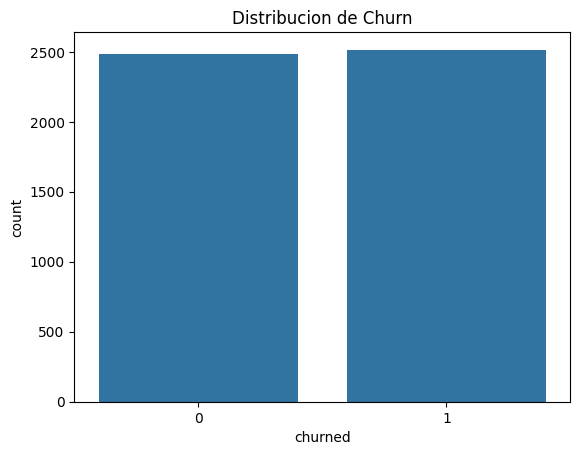

In [ ]:
sns.countplot(x="churned", data=df)
plt.title("Distribucion de Churn")
plt.show()

- El dataset está moderadamente balanceado

- No requiere técnicas de balanceo

- Métricas como Accuracy y F1 son válidas

In [ ]:
#Verificar que todo sean valores unicos
df.customer_id.nunique()

5000

In [ ]:
#Eliminar el customer_id ya que no sera util para el analisis
df=df.drop(['customer_id'],axis=1)

In [ ]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


#**ANALISIS DE VARIABLES NUMERICAS**

##**Distribucion de varibles clave**

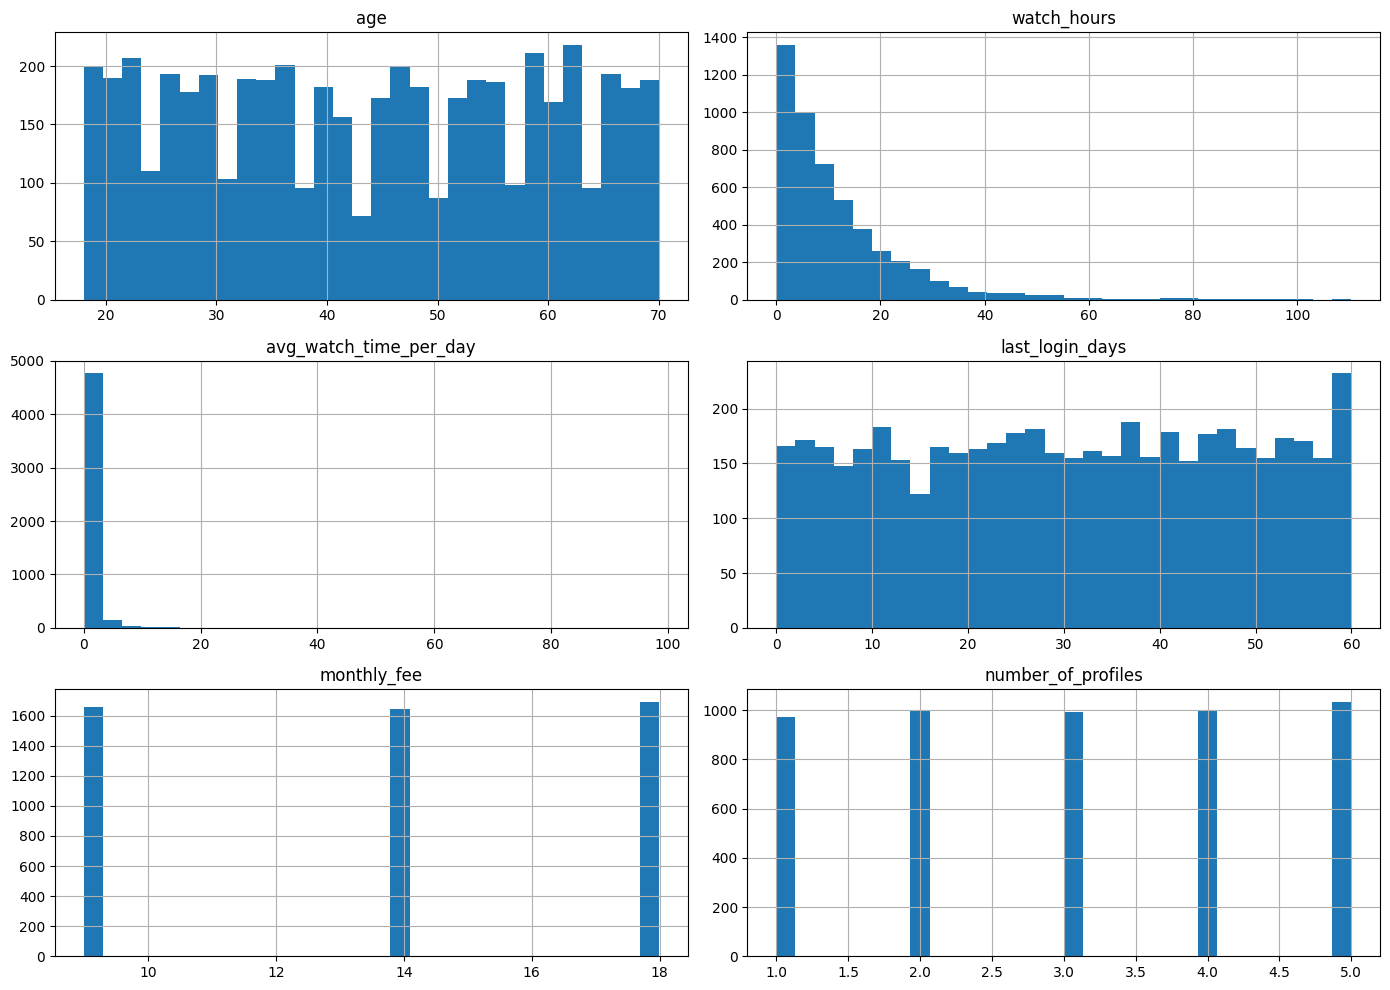

In [ ]:
num_cols = [
    "age",
    "watch_hours",
    "avg_watch_time_per_day",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles"
]

df[num_cols].hist(bins=30, figsize=(14,10))
plt.tight_layout()
plt.show()

**age (Edad)**

- Distribución relativamente uniforme o levemente concentrada en adultos.

- No hay extremos muy marcados.

- La edad por sí sola no es un predictor fuerte de churn.

**watch_hours (total de horas vistas)**

- Distribución sesgada a la derecha.

- Muchos usuarios con pocas horas.

- Pocos usuarios con muchas horas.

- Usuarios con pocas horas totales suelen tener mayor churn.

**avg_watch_time_per_day (Uso promedio por dia)**

- Concentración en valores bajos.

- Cola larga hacia valores altos.

- La mayoría consume poco contenido diario.

- Usuarios con consumo diario bajo son más propensos a churn.

**last_login_days (dias desde el ultimo login)**

- Distribución muy asimétrica.

- Muchos usuarios con pocos días desde el último login.

- Algunos con muchos días sin entrar.

- Variable crítica para churn.

- A más días sin login, mayor riesgo de cancelación.

**monthly_fee (cuotal mensual)**

- Distribución por niveles (planes).

- Picos que corresponden a tipos de suscripción.

- El precio está ligado al plan.

- Clientes con fee alto y bajo uso son candidatos a churn.

**number_of_profiles (numero de perfiles)**

- Valores (1, 2, 3, 4 perfiles).

- Mayor concentración en 1 o 2 perfiles.

- Cuentas con más perfiles suelen tener menor churn.

- Más perfiles implica más usuarios dependientes del servicio.

**CONCLUSION**
Los histogramas muestran que el churn está más relacionado con el uso reciente y el nivel de engagement que con características demográficas.

##**Relacion entre Variables Numéricas y Churn**

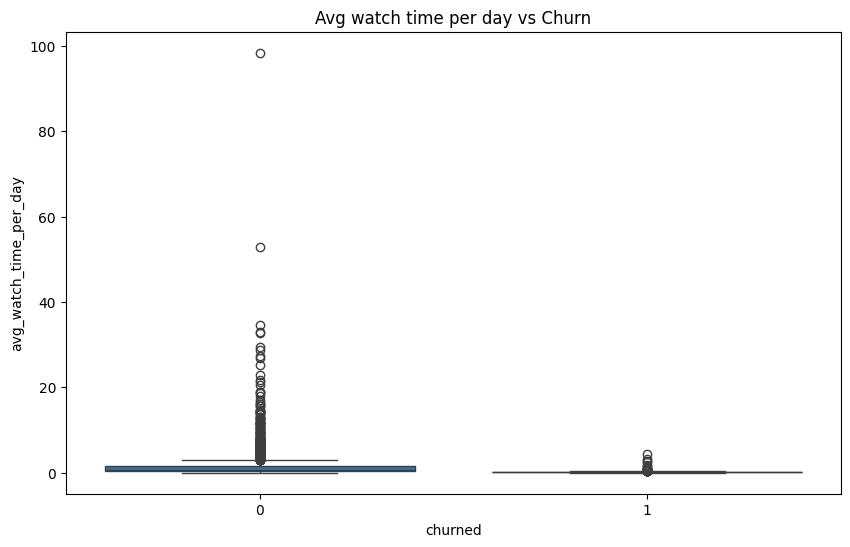

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churned", y="avg_watch_time_per_day", data=df)
plt.title("Avg watch time per day vs Churn")
plt.show()

**Clientes que NO cancelaron (churned = 0)**

- Mediana de avg_watch_time_per_day más alta

- Caja más arriba

Indica:

- uso diario constante

- hábito de consumo

**Clientes que SÍ cancelaron (churned = 1)**

- Mediana claramente más baja

- Caja desplazada hacia abajo

Indica:

- bajo engagement

- pérdida de hábito antes de cancelar

**Conclusion**
El boxplot muestra que los clientes que cancelan tienen un uso diario significativamente menor, lo que valida el engagement como el principal predictor de churn.

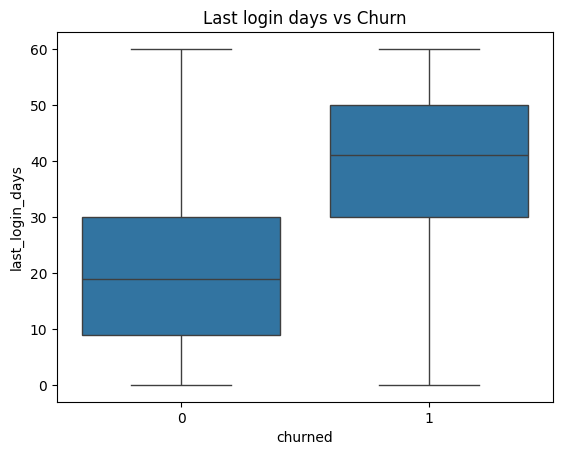

In [ ]:
sns.boxplot(x="churned", y="last_login_days", data=df)
plt.title("Last login days vs Churn")
plt.show()

**Clientes que NO churnearon (churned = 0)**

- Mediana baja de last_login_days

- Caja concentrada en valores pequeños

Indica:

- uso reciente

- hábito activo

**Clientes que SÍ churnearon (churned = 1)**

- Mediana mucho más alta

- Caja desplazada hacia arriba

Indica:

- largos periodos sin entrar

- desinterés previo a la cancelación


Mientras más días pasan sin que el cliente inicie sesión, mayor es la probabilidad de que cancele.

Entonces, el churn no ocurre de inmediato, primero hay inactividad yluego la cancelación.

**Conclusion**

El boxplot muestra que los clientes que cancelan pasan significativamente más días sin iniciar sesión, lo que convierte la inactividad en uno de los principales predictores de churn.

#**VARIABLES CATEGROICAS VS CHURN**

##**Tipo de suscripcion**

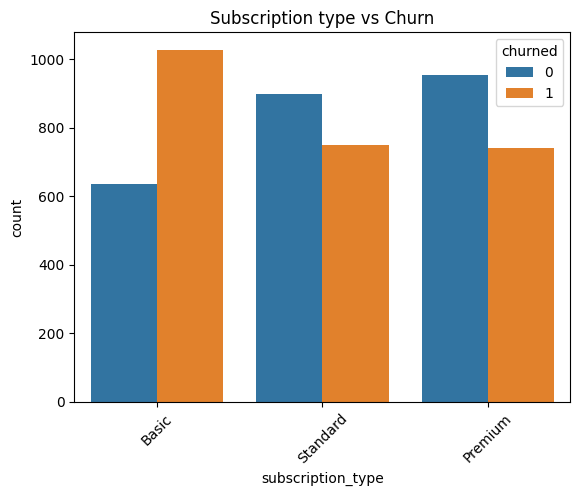

In [ ]:
sns.countplot(x="subscription_type", hue="churned", data=df)
plt.xticks(rotation=45)
plt.title("Subscription type vs Churn")
plt.show()

**Planes básicos**

- Mayor proporción de churn

- Menor compromiso económico

- Clientes más sensibles al precio

**Planes intermedios**

- Churn moderado

- Mejor balance entre costo y valor

**Planes premium**

- Menor churn relativo

- Clientes con mayor engagement

- Más inversión en el servicio

Los clientes con planes más básicos tienden a cancelar más que los clientes con planes premium.

Esto es muy importante porque el tipo de plan sí influye en la retención y no todos los clientes tienen el mismo riesgo

**Conclusion**

Observamos que los planes básicos concentran mayor churn, mientras que los planes premium presentan mayor retención, lo que demuestra que el tipo de suscripción es un factor clave en la cancelación.

##**Metodo de pago**

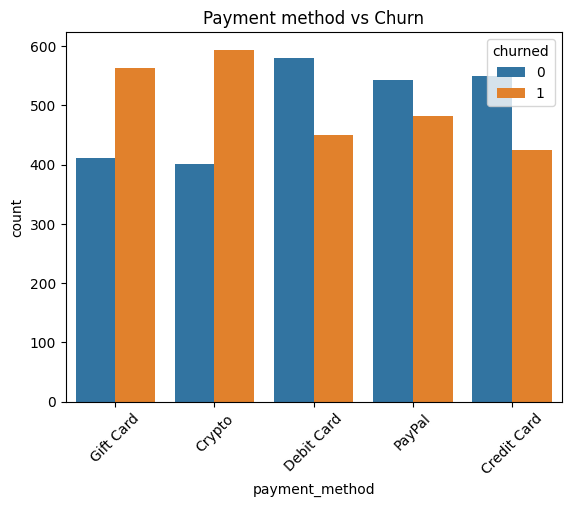

In [ ]:
sns.countplot(x="payment_method", hue="churned", data=df)
plt.xticks(rotation=45)
plt.title("Payment method vs Churn")
plt.show()

**Métodos de pago automáticos (tarjeta de credito, debito, etc)**

- Menor proporción de churn

- Menos cancelaciones involuntarias

**Métodos manuales (transferencias o pagos manuales en dias especificos)**

- Mayor proporción de churn

- Más fallos de pago

- Mayor abandono

El método de pago influye en la retención del cliente.
Los pagos automáticos reducen el churn, mientras que los métodos manuales lo incrementan.

**Conclusion**

Se observa que los clientes con métodos de pago automáticos presentan menor churn, mientras que los métodos manuales muestran mayor tasa de cancelación.

##**Dispositivo**

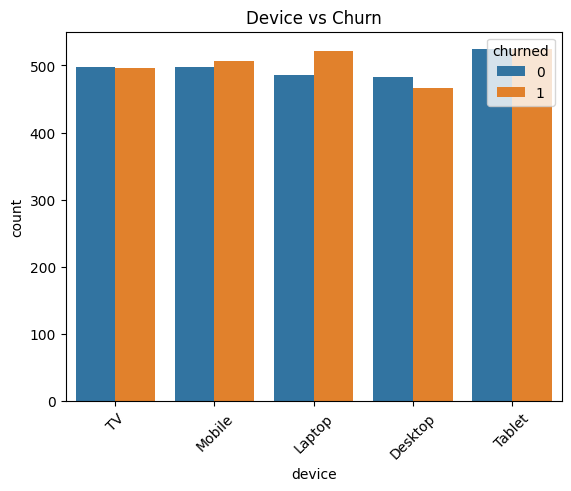

In [ ]:
sns.countplot(x="device", hue="churned", data=df)
plt.xticks(rotation=45)
plt.title("Device vs Churn")
plt.show()

**Dispositivos de uso cómodo (TV, desktop)**

- Menor proporción de churn

- Uso más frecuente y compartido

- Mayor hábito de consumo

**Dispositivos personales (Mobile, Laptop)**

- Churn ligeramente más alto

- Uso más casual o esporádico

- Menor compromiso


**Conclusion**

El tipo de dispositivo muestra diferencias moderadas en churn, por lo que la experiencia de uso influye, aunque el abandono está principalmente explicado por el nivel de actividad y engagement.

#**CORRELACION ENTRE VARIBLES NUMERICAS**

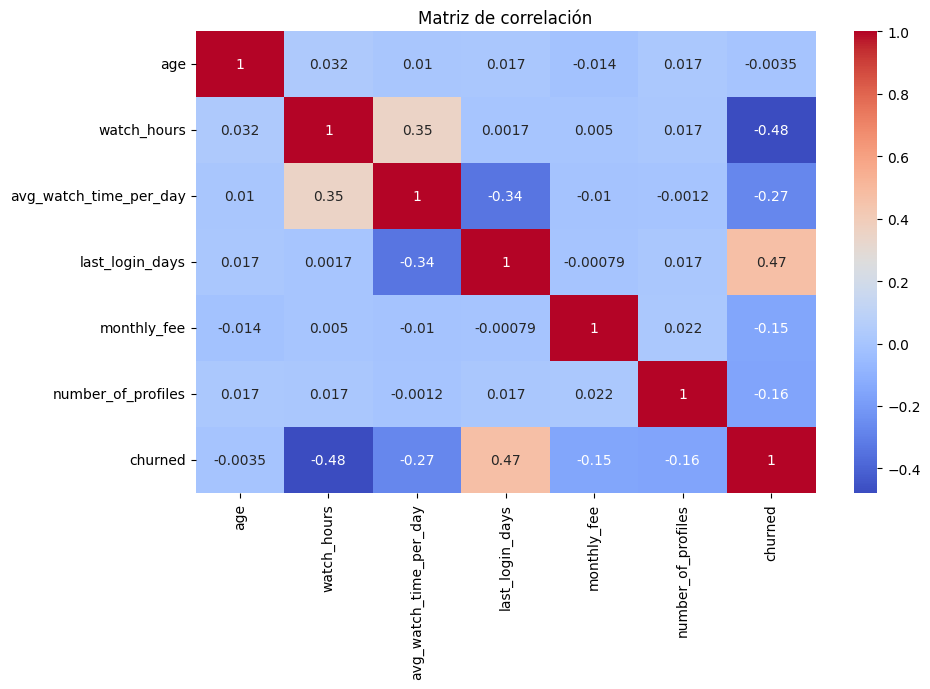

In [ ]:
corr = df[num_cols + ["churned"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

**Conclusion**

La matriz de correlación confirma que el churn está principalmente asociado a patrones de uso e inactividad.

#**MODELADO Y SEPARACION DE DATOS**

##**Definir variables (features) y target**

In [ ]:
features = [
    "age",
    "subscription_type",
    "avg_watch_time_per_day",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles",
    "payment_method",
    "device",
    "region",
    "favorite_genre"
]

X = df[features]
y = df["churned"]

##**Separación Train / Test**

In [ ]:
#80% de entrenamiento 20% prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42,stratify=y)

Usamos un split 80/20 con estratificación para mantener la proporción de churn y asegurar una evaluación justa y reproducible del modelo.

#**Preprocesamiento (numéricas y categóricas)**

##**Identificar tipos de variables**

In [ ]:
numeric_variable = [
    "age",
    "avg_watch_time_per_day",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles"
]

categorical_variable = [
    "subscription_type",
    "payment_method",
    "device",
    "region",
    "favorite_genre"
]

##**Construir transformador**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_variable),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_variable)
    ]
)

- Usamos un ColumnTransformer para aplicar escalado a variables numéricas y One Hot Encoding a variables categóricas, asegurando consistencia entre entrenamiento y producción.

- No usamos get_dummies porque no es seguro ante categorías nuevas.

#**MODELO BASE: Logistic Regresion**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

#**ENTRENAMIENTO DE MODELO**

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'avg_watch_time_per_day',
                                                   'last_login_days',
                                                   'monthly_fee',
                                                   'number_of_profiles']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['subscription_type',
                                                   'payment_method', 'device',
                                                   'region',
                                                   'favorite_genre'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Con model.fit entrenamos el pipeline completo, aprendiendo los patrones de churn a partir de los datos de entrenamiento.

#**EVALUACION DEL MODELO**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       497
           1       0.86      0.94      0.90       503

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.89      0.89      1000

ROC AUC: 0.9678548427743399


##**INTERPRETACION**

##**NO CHURN --> 0**

**- Precision (0.93)**- Cuando el model predice NO CHURN, el 93% de las veces acierta.

**- Recall (0.85)** - Identifica correctamente al 85% de los clientes que realmente no cancelan.

**- F1 Score (0.89)** - Buen balance en precision y recall.

##**CHURN  --> 1 (+ IMPORTANTE)**

**- Recall (0.94)**- El modelo detecta el 94% de los clientes que sí van a cancelar

**- Precision (0.86)** - De los clientes marcados como churn, el 86% realmente lo son.

**- F1 Score (0.90)** - Buen balance.

- Muy pocos churns reales se escapan.

- El recall alto implica algunos falsos positivos. Esto es aceptable ya que es mejor contactar demas, que perder clientes reales.

**Accuracy (0,89)**: El modelo acierta el 89% de las predicciones.

**Macro avg (0.89) y weighted avg (0.89)**

El modelo funciona igula de bien para ambas clases y no hay una clase que este dominando. Por lo tanto esto hace que el accuracy se confiable.

**Support**
- NO Churn (497)

- Churn (503)

- Total evaluado (1000)

Clases balanceadas.


**ROC Y AUC (0.968) Excelente**

- El modelo distingue muy bien entre clientes que van a cancelar y los que no.

- Si tomas un churn y un no churn al azar, el modelo los ordena correctamente el 97% de las veces.

##**Conclusion**

Nuestro modelo prioriza detectar clientes en riesgo de cancelación, logrando identificar el 94% de los churn reales, lo que permite acciones preventivas con alto impacto.

#**MATRIZ DE CONFUSION**

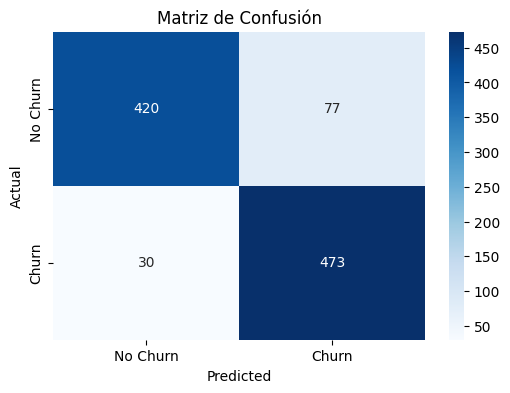

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

##**INTERPRETACION**
**Verdaderos negativos = 420**

- Clientes que NO churnearon, el modelo predijo correctamente en NO churn.

**Falsos Positivos = 77**

- Clientes que NO iban a churnear y el modelo marco como Churn (falsa alarma).

**Falsos Negativos = 30**

- Clientes que SÍ churnearon y el modelo no los detecto.

**Verdaderos Positivos = 473**

- Clientes que SÍ churnearon y el modelo los detectó correctamente

##**CONCLUSION**

El modelo es confiable para detectar clientes en riesgo de churn y aplicar acciones preventivas, con bajo riesgo de falsas alarmas y mínima pérdida de churn real.


##**Modelo entrenado sin avg_watch_time_per_Day, gender y id_customer**

In [ ]:
features02 = [
    "age",
    "subscription_type",
    "watch_hours",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles",
    "payment_method",
    "device",
    "region",
    "favorite_genre"
]

X = df[features02]
y = df["churned"]

In [ ]:
#80% de entrenamiento 20% prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
numeric_var = [
    "age",
    "watch_hours",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles"
]

categorical_var = [
    "subscription_type",
    "payment_method",
    "device",
    "region",
    "favorite_genre"
]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
preprocessor02 = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_var),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_var)
    ]
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model02 = Pipeline(steps=[
    ("preprocessor02", preprocessor02),
    ("classifier02", LogisticRegression(max_iter=1000))
])

In [ ]:
model02.fit(X_train, y_train)

Pipeline(steps=[('preprocessor02',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'watch_hours',
                                                   'last_login_days',
                                                   'monthly_fee',
                                                   'number_of_profiles']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['subscription_type',
                                                   'payment_method', 'device',
                                                   'region',
                                                   'favorite_genre'])])),
                ('classifier02', LogisticRegression(max_iter=1000))])

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred02 = model02.predict(X_test)
y_prob02 = model02.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred02))
print("ROC AUC:", roc_auc_score(y_test, y_prob02))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       497
           1       0.88      0.90      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

ROC AUC: 0.9613826097739518


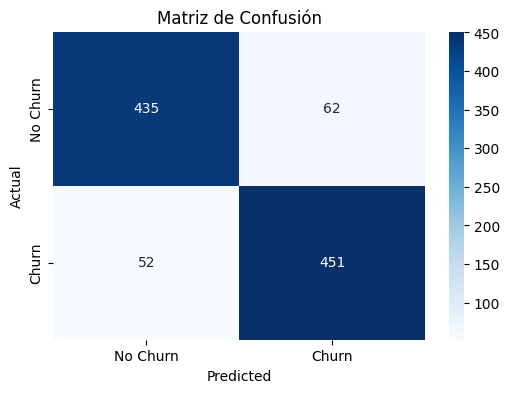

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred02)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
import joblib

joblib.dump(
    {
        'model': model02,
        'trained_at': '2026-01-13'
    },
    'hackaton_churn_v2.pkl'
)

['hackaton_churn_v2.pkl']